In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
enf = pd.read_csv('encoding_finished_v2.csv')
enf= enf.drop(columns =['Unnamed: 0'], axis=1) #필요없는 컬럼 삭제
enf.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,0,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,0,1,0,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,0,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,0,0,1,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,0,0,0,2,0,0


# 특성(x)과 타겟(y)분리

In [3]:
enf.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Attrition_Flag_Attrited Customer',
       'new_income_category', 'new_edu_category', 'new_card_category'],
      dtype='object')

In [4]:
y = enf['Attrition_Flag_Attrited Customer']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag_Attrited Customer, Length: 10127, dtype: int64

In [5]:
x = enf[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]
x.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,1,0,0,3,3,0


In [6]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

# train, test 분리

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
x_train.shape, x_test.shape

((7088, 21), (3039, 21))

In [9]:
x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.3000888713340575

# 7.Gradient Boosting Classifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.5)
gbc.fit(x_train,y_train)
gbc_ypred=gbc.predict(x_test)
gbc_yproba=gbc.predict_proba(x_test)

In [11]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred))
print('정확도: ',accuracy_score(y_test, gbc_ypred))
print('재현율: ',recall_score(y_test, gbc_ypred))
print('정밀도: ',precision_score(y_test, gbc_ypred))
print('f1점수: ',f1_score(y_test, gbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.92      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9693978282329714
재현율:  0.8870967741935484
정밀도:  0.9224318658280922
f1점수:  0.9044193216855086
ROC-AUC점수:  0.9362735148985831


In [12]:
# train set 정확도
score_train = gbc.score(x_train, y_train) 
print('{:.3f}'.format(score_train))

# 일반화 정확도
score_test = gbc.score(x_test, y_test) 
print('{:.3f}'.format(score_test))

0.999
0.969


In [ ]:
#max-depth 조정

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.5)
gbc.fit(x_train,y_train)
gbc_ypred2=gbc.predict(x_test)
gbc_yproba2=gbc.predict_proba(x_test)

In [14]:
# train set 정확도
d_score_train = gbc.score(x_train, y_train) 
print('{:.3f}'.format(d_score_train))

# 일반화 정확도
d_score_test = gbc.score(x_test, y_test) 
print('{:.3f}'.format(d_score_test))

0.989
0.965


In [15]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred2))
print('정확도: ',accuracy_score(y_test, gbc_ypred2))
print('재현율: ',recall_score(y_test, gbc_ypred2))
print('정밀도: ',precision_score(y_test, gbc_ypred2))
print('f1점수: ',f1_score(y_test, gbc_ypred2))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred2))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.87      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.93      0.93      3039
weighted avg       0.96      0.97      0.96      3039

정확도:  0.9651201052977953
재현율:  0.8709677419354839
정밀도:  0.9113924050632911
f1점수:  0.890721649484536
ROC-AUC점수:  0.9272259079319574


In [ ]:
#learning rate 조정

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.3)
gbc.fit(x_train,y_train)
gbc_ypred3=gbc.predict(x_test)
gbc_yproba3=gbc.predict_proba(x_test)

In [17]:
# train set 정확도
l_score_train = gbc.score(x_train, y_train) 
print('{:.3f}'.format(l_score_train))

# 일반화 정확도
l_score_test = gbc.score(x_test, y_test) 
print('{:.3f}'.format(l_score_test))

0.992
0.965


In [18]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred3))
print('정확도: ',accuracy_score(y_test, gbc_ypred3))
print('재현율: ',recall_score(y_test, gbc_ypred3))
print('정밀도: ',precision_score(y_test, gbc_ypred3))
print('f1점수: ',f1_score(y_test, gbc_ypred3))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred3))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.90      0.88      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9654491609081934
재현율:  0.8830645161290323
정밀도:  0.9030927835051547
f1점수:  0.8929663608562691
ROC-AUC점수:  0.9322912041911381


In [ ]:
# RandomizedSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV

gbc = GradientBoostingClassifier()

dists = {
    'loss' : ['deviance', 'exponential'],
    #실수의 경우 보통은 아래처럼 10단위로 지정 
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'n_estimators' : [100, 200, 300, 400, 500, 600],
    'max_depth':[2, 3, 4, 5]
}

rds = RandomizedSearchCV(
    gbc, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='f1',  #평가 기준: f1
    verbose=1,
    n_jobs=-1,
    random_state=0
)
rds.fit(x_train, y_train)
print('최적 하이퍼파라미터: ', rds.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.9min finished


최적 하이퍼파라미터:  {'n_estimators': 400, 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.1}


In [80]:
pipe = rds.best_estimator_

y_val_pred = pipe.predict(x_test)
y_train_pred = pipe.predict(x_train)

print('훈련 f1 score: ', f1_score(y_train, y_train_pred, average='binary'))
print('검증 f1 score: ', f1_score(y_test, y_val_pred, average='binary'))

훈련 f1 score:  1.0
검증 f1 score:  0.9050051072522982


In [81]:
print('             분류 보고서')
print(classification_report(y_test,y_val_pred))
print('정확도: ',accuracy_score(y_test, y_val_pred))
print('재현율: ',recall_score(y_test, y_val_pred))
print('정밀도: ',precision_score(y_test, y_val_pred))
print('f1점수: ',f1_score(y_test, y_val_pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_val_pred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.92      0.89      0.91       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9693978282329714
재현율:  0.8931451612903226
정밀도:  0.917184265010352
f1점수:  0.9050051072522982
ROC-AUC점수:  0.938707853944414


In [ ]:
#기존 결과
분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.92      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9693978282329714
재현율:  0.8870967741935484
정밀도:  0.9224318658280922
f1점수:  0.9044193216855086
ROC-AUC점수:  0.9362735148985831

bayesian-optimization 참고  
https://wooono.tistory.com/102  
https://dacon.io/codeshare/1720?dtype=recent  

In [ ]:
# bayesian-optimization

In [82]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [90]:
# 탐색 대상 함수

# 모델 정의
def gbc_cv(learning_rate, n_estimators, max_depth):
    model = GradientBoostingClassifier(
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                max_depth = int(round(max_depth)),
                               )
    # 모델 훈련
    model.fit(x_train, y_train)

    # 예측값 출력
    bo_y_pred= model.predict(x_test)

    # 각종 metric 계산
    acc = accuracy_score(y_test, bo_y_pred)
    recall = recall_score(y_test, bo_y_pred)
    precision= precision_score(y_test, bo_y_pred)
    f1 = f1_score(y_test, bo_y_pred)
    roc_auc = roc_auc_score(y_test, bo_y_pred)
    
    # 사용할 metric 반환
    return f1

In [91]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'learning_rate' : (0.0001, 0.1),
           'n_estimators': (100, 600),
           'max_depth': (1, 10),
          }

In [92]:
#객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo_gbc = BayesianOptimization(f = gbc_cv, pbounds = pbounds, verbose = 2, random_state = 0 )

In [93]:
# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
bo_gbc.maximize(init_points=5, n_iter = 20, acq='ei', xi=0.01)

#target 값은 목적함수의 return 값으로 score에 해당
# 'iter’는 반복 회차, ‘target’은 목적 함수의 return값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        |  0.8937   |  0.05493  |  7.437    |  401.4    |
|  2        |  0.898    |  0.05453  |  4.813    |  422.9    |
|  3        |  0.8937   |  0.04381  |  9.026    |  581.8    |
|  4        |  0.8859   |  0.03841  |  8.126    |  364.4    |
|  5        |  0.8776   |  0.05685  |  9.33     |  135.5    |
|  6        |  0.8827   |  0.05564  |  9.897    |  492.3    |
|  7        |  0.901    |  0.06078  |  2.597    |  421.5    |
|  8        |  0.8072   |  0.09962  |  1.007    |  413.2    |
|  9        |  0.8      |  0.09004  |  1.472    |  424.7    |
|  10       |  0.905    |  0.09171  |  3.545    |  421.7    |
|  11       |  0.9026   |  0.04714  |  3.7      |  419.7    |
|  12       |  0.8992   |  0.04013  |  6.424    |  421.1    |
|  13       |  0.8921   |  0.08133  |  8.49     |  424.2    |
|  14       |  0.8843   |  0.03834  |  9.442    |  398.0    |
|  15   

In [94]:
# 찾은 파라미터 값 확인
print(bo_gbc.max)

{'target': 0.9049586776859504, 'params': {'learning_rate': 0.09170675678400313, 'max_depth': 3.5450604447647787, 'n_estimators': 421.74677039184473}}


In [97]:
#파라미터 적용
fit_gbc = GradientBoostingClassifier(learning_rate=bo_gbc.max['params']['learning_rate'],
                               n_estimators=int(bo_gbc.max['params']['n_estimators']),                                         
                               max_depth = int(round(bo_gbc.max['params']['max_depth'])),
                               )

In [100]:
fit_gbc.fit(x_train, y_train)
bo_gbc_ypred=fit_gbc.predict(x_test)

In [101]:
print('             분류 보고서')
print(classification_report(y_test,bo_gbc_ypred))
print('정확도: ',accuracy_score(y_test, bo_gbc_ypred))
print('재현율: ',recall_score(y_test, bo_gbc_ypred))
print('정밀도: ',precision_score(y_test, bo_gbc_ypred))
print('f1점수: ',f1_score(y_test, bo_gbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, bo_gbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.93      0.89      0.91       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9700559394537677
재현율:  0.8850806451612904
정밀도:  0.9281183932346723
f1점수:  0.9060887512899898
ROC-AUC점수:  0.9358553048850101


In [ ]:
#기존 결과
분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.92      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9693978282329714
재현율:  0.8870967741935484
정밀도:  0.9224318658280922
f1점수:  0.9044193216855086
ROC-AUC점수:  0.9362735148985831

In [33]:
columns = x_train.columns

feature_importance = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.0184,0.000717,0.002717,0.079492,0.010013,0.016839,0.003539,0.189779,0.009805,0.036065,...,0.346777,0.082224,0.003819,0.000747,0.00182,0.00005,0.000189,0.000549,0.001734,0.0


In [34]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492


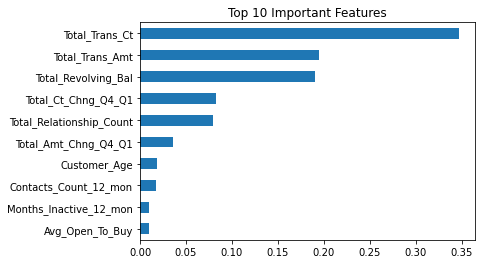

In [35]:
feat_importances = pd.Series(gbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 8.XGBoost classifier

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=1.0, max_depth =4)
xgb.fit(x_train, y_train)
xgb_ypred = xgb.predict(x_test)
xgb_yproba = xgb.predict_proba(x_test)

[18:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
print('             분류 보고서')
print(classification_report(y_test, xgb_ypred))
print('정확도: ',accuracy_score(y_test, xgb_ypred)) 
print('재현율: ',recall_score(y_test,  xgb_ypred))
print('정밀도: ',precision_score(y_test,  xgb_ypred))
print('f1점수: ',f1_score(y_test,  xgb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, xgb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.89      0.89      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9651201052977953
재현율:  0.8931451612903226
정밀도:  0.8931451612903226
f1점수:  0.8931451612903226
ROC-AUC점수:  0.9361518177666713


In [ ]:
# bayesian-optimization

In [105]:
from xgboost import XGBClassifier
# 모델 정의
def xgb_cv(learning_rate, n_estimators, max_depth):
    model = XGBClassifier(
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                max_depth = int(round(max_depth)),
                               )
    # 모델 훈련
    model.fit(x_train, y_train)

    # 예측값 출력
    bo_y_pred2= model.predict(x_test)

    # 각종 metric 계산
    acc = accuracy_score(y_test, bo_y_pred2)
    recall = recall_score(y_test, bo_y_pred2)
    precision= precision_score(y_test, bo_y_pred2)
    f1 = f1_score(y_test, bo_y_pred2)
    roc_auc = roc_auc_score(y_test, bo_y_pred2)
    
    # 사용할 metric 반환
    return f1

In [106]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'learning_rate' : (0.0001, 0.1),
           'n_estimators': (100, 600),
           'max_depth': (1, 10),
          }

In [108]:
import warnings
warnings.filterwarnings('ignore')
bo_xgb = BayesianOptimization(f = xgb_cv, pbounds = pbounds, verbose = 2, random_state = 0 )
bo_xgb.maximize(init_points=5, n_iter = 20, acq='ei', xi=0.01)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
[12:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
|  1        |  0.8909   |  0.05493  |  7.437    |  401.4    |
[12:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
|  2        |  0.9045   |  0.05453  |  4.813    |  422.9    |
[12:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the

|  20       |  0.8926   |  0.01668  |  4.377    |  530.9    |
[12:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
|  21       |  0.8882   |  0.08743  |  2.634    |  121.6    |
[12:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
|  22       |  0.8918   |  0.05165  |  9.169    |  310.1    |
[12:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:log

In [109]:
print(bo_xgb.max)

{'target': 0.904564315352697, 'params': {'learning_rate': 0.025893614371041457, 'max_depth': 4.124755516846121, 'n_estimators': 420.339608606918}}


In [110]:
#파라미터 적용
fit_xgb = XGBClassifier(learning_rate=bo_gbc.max['params']['learning_rate'],
                               n_estimators=int(bo_gbc.max['params']['n_estimators']),                                         
                               max_depth = int(round(bo_gbc.max['params']['max_depth'])),
                               )

fit_xgb.fit(x_train, y_train)
bo_xgb_ypred=fit_gbc.predict(x_test)

[12:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [111]:
print('             분류 보고서')
print(classification_report(y_test,bo_xgb_ypred))
print('정확도: ',accuracy_score(y_test, bo_xgb_ypred))
print('재현율: ',recall_score(y_test, bo_xgb_ypred))
print('정밀도: ',precision_score(y_test, bo_xgb_ypred))
print('f1점수: ',f1_score(y_test, bo_xgb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, bo_xgb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.93      0.89      0.91       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9700559394537677
재현율:  0.8850806451612904
정밀도:  0.9281183932346723
f1점수:  0.9060887512899898
ROC-AUC점수:  0.9358553048850101


In [ ]:
#기존 결과
분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.89      0.89      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9651201052977953
재현율:  0.8931451612903226
정밀도:  0.8931451612903226
f1점수:  0.8931451612903226
ROC-AUC점수:  0.9361518177666713

In [38]:
columns = x_train.columns

feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.034004,0.011509,0.014365,0.146423,0.07735,0.05099,0.019263,0.146235,0.010699,0.034397,...,0.22117,0.055214,0.009926,0.019697,0.015639,0.005338,0.02236,0.00899,0.010633,0.007575


In [39]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


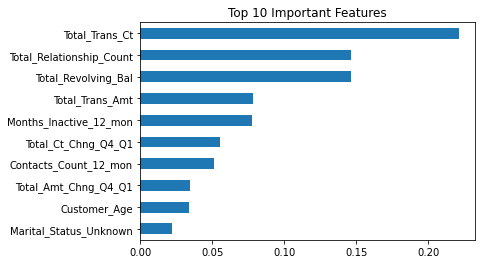

In [40]:
feat_importances = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()